### SuperStore Sales Data: Case Study

# EDA Steps and Requirements:

## 1. Data Loading and Initial Exploration

a.) Load the dataset into a pandas DataFrame. 
b.) Explore the first few rows to understand the structure of data.
c.) check the datatype,summary statistics and unique value of each column.
d.) Identify any obvious data quality issues or inconsistence.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('superstore_eda')

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()
df_shape = df.shape
df_columns = df.columns.tolist()

df_info, df_head, df_shape, df_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Customer Name  10014 non-null  object 
 7   Segment        10014 non-null  object 
 8   Country        10014 non-null  object 
 9   City           10014 non-null  object 
 10  State          10014 non-null  object 
 11  Postal Code    10014 non-null  int64  
 12  Region         10014 non-null  object 
 13  Product ID     10014 non-null  object 
 14  Category       10014 non-null  object 
 15  Sub-Category   10014 non-null  object 
 16  Product Name   10014 non-null  object 
 17  Sales Price    10014 non-null  float64
 18  Quanti

(None,
    Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
 0       1  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
 1       2  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
 2       3  CA-2016-138688   12/06/16  16/06/16    Second Class    DV-13045   
 3       4  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
 4       5  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City  ...  \
 0      Claire Gute   Consumer  United States        Henderson  ...   
 1      Claire Gute   Consumer  United States        Henderson  ...   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
 
   Postal Code  Region       Product ID         Category Sub-Category  \
 0       42420  

# 2. Handling Duplicates:

In [ ]:
a.) Identify and remove duplicate rows in the dataset.
b.) Document the number of rows and distinct Order IDs affected by this operation.

In [8]:
initial_shape = df.shape
initial_unique_orders = df['Order ID'].nunique()

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Shape after removing duplicates
final_shape = df_cleaned.shape
final_unique_orders = df_cleaned['Order ID'].nunique()

# Number of rows and Order IDs affected
rows_removed = initial_shape[0] - final_shape[0]
order_ids_affected = initial_unique_orders - final_unique_orders

rows_removed, order_ids_affected, final_shape, final_unique_orders

(17, 0, (9997, 21), 5009)

# 3. Date Handling:

a.) Normalize the Order Date and Ship Date columns to ensure consistent date formats. Ensure that the format of date is consistent across all rows. 
b.) Extract the year from the Order ID and compare it with the year in Order Date.Correct any inconsistencies.
c.) Document the number of rows and distinct Order IDs affected by these operations.

In [10]:
# Convert Order Date and Ship Date to datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], errors='coerce')

# Extract year from Order ID (assumes format like 'CA-2017-152156')
df_cleaned['Order Year from ID'] = df_cleaned['Order ID'].str.extract(r'(\d{4})').astype(float)

# Extract actual year from Order Date
df_cleaned['Order Year from Date'] = df_cleaned['Order Date'].dt.year

# Identify discrepancies
date_discrepancy = df_cleaned[df_cleaned['Order Year from ID'] != df_cleaned['Order Year from Date']]

# Number of rows and distinct Order IDs affected
rows_affected = date_discrepancy.shape[0]
order_ids_affected = date_discrepancy['Order ID'].nunique()

rows_affected, order_ids_affected, date_discrepancy[['Order ID', 'Order Date', 'Order Year from ID', 'Order Year from Date']].head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\82726247.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\82726247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\82726247.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consist

(40,
 16,
            Order ID Order Date  Order Year from ID  Order Year from Date
 62   CA-2015-135545 2017-11-24              2015.0                  2017
 63   CA-2015-135545 2017-11-24              2015.0                  2017
 64   CA-2015-135545 2017-11-24              2015.0                  2017
 65   CA-2015-135545 2017-11-24              2015.0                  2017
 943  CA-2015-120880 2013-05-29              2015.0                  2013)

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract correct year from Order Date
df['Order Year (from Date)'] = df['Order Date'].dt.year

# Extract components from Order ID
df[['Region Code', 'ID Year', 'Order Number']] = df['Order ID'].str.split('-', expand=True)

# Correct the ID Year with year from Order Date
df['Corrected Order ID'] = df['Region Code'] + '-' + df['Order Year (from Date)'].astype(str) + '-' + df['Order Number']

# Check how many were updated
updated_rows = df[df['Order ID'] != df['Corrected Order ID']]
num_rows_updated = updated_rows.shape[0]
distinct_order_ids_updated = updated_rows['Order ID'].nunique()

print(f"✅ Updated {num_rows_updated} rows.")
print(f"🔄 Affected {distinct_order_ids_updated} unique Order IDs.")

# Replace the old Order ID
df['Order ID'] = df['Corrected Order ID']
df.drop(columns=['Order Year (from Date)', 'Region Code', 'ID Year', 'Order Number', 'Corrected Order ID'], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\3181945389.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


✅ Updated 40 rows.
🔄 Affected 16 unique Order IDs.


## 4. Imputation of Missing Values:

a.) Impute missing values in the Ship Mode column using the calculated Days to Ship column. 
b.) Calculate Days to Ship as the difference between Ship Date and Order Date. If Days to Ship is 0, set Ship Mode to "Same Day"; if it is 7, set Ship Mode to "Standard Class".
c.) Impute missing values in the Quantity column using a method of your choice. Print the rationale for selecting the method for imputation.
d.) Document the number of rows and distinct Order IDs affected by these operations.

In [14]:
# Ensure both dates are datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Check how many Ship Mode values are missing
missing_ship_mode_before = df['Ship Mode'].isna().sum()

# Apply logic to fill missing values
df.loc[(df['Ship Mode'].isna()) & (df['Days to Ship'] == 0), 'Ship Mode'] = 'Same Day'
df.loc[(df['Ship Mode'].isna()) & (df['Days to Ship'] == 7), 'Ship Mode'] = 'Standard Class'

# Count remaining missing after these rules
missing_ship_mode_after = df['Ship Mode'].isna().sum()

# Print affected rows and order IDs
ship_mode_affected = df[df['Ship Mode'].isna() | (df['Days to Ship'] == 0) | (df['Days to Ship'] == 7)]
print(f"🔧 Imputed Ship Mode for {missing_ship_mode_before - missing_ship_mode_after} rows using Days to Ship.")
print(f"🔄 Affected {ship_mode_affected['Order ID'].nunique()} unique Order IDs.")

# Check missing Quantity values
missing_qty_before = df['Quantity'].isna().sum()

# Impute with median
median_qty = df['Quantity'].median()
df['Quantity'].fillna(median_qty, inplace=True)

missing_qty_after = df['Quantity'].isna().sum()
qty_affected = df[df['Quantity'] == median_qty]  # recently filled

print(f"📦 Imputed Quantity for {missing_qty_before - missing_qty_after} rows using median = {median_qty}.")
print(f"🔄 Affected {qty_affected['Order ID'].nunique()} unique Order IDs.")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\2177400258.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


🔧 Imputed Ship Mode for 76 rows using Days to Ship.
🔄 Affected 390 unique Order IDs.
📦 Imputed Quantity for 18 rows using median = 3.0.
🔄 Affected 1919 unique Order IDs.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\2177400258.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(median_qty, inplace=True)


## 5. Data Masking and String Handling:

a.) Drop the Customer Name column to protect Personal Identifiable Information (PII).
b.) Create a new column called Customer Name Masked, containing only the initials of the customer name.
(Note:It's important to protect PII in datasets to maintain customer privacy and comply with data protection regulations. Masking or dropping sensitive data like customer names is a crucial step in this process.)
c.) Convert the Postal Code column from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary.
 

In [16]:


# Load dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('superstore_eda')
# Print all column names to identify the exact issue
print("Column names in the dataset:")
for col in df.columns:
    print(f"'{col}'")


Column names in the dataset:
'Row ID'
'Order ID'
'Order Date'
'Ship Date'
'Ship Mode'
'Customer ID'
'Customer Name'
'Segment'
'Country'
'City'
'State'
'Postal Code'
'Region'
'Product ID'
'Category'
'Sub-Category'
'Product Name'
'Sales Price'
'Quantity'
'Discount'
'Profit'


In [18]:
def get_initials(name):
    if pd.isna(name):
        return None
    parts = name.strip().split()
    return ''.join([p[0].upper() for p in parts if p])

df['Customer Name Masked'] = df['Customer Name'].apply(get_initials)
df.drop(columns=['Customer Name'], inplace=True)
df['Postal Code'] = df['Postal Code'].astype(str).str.zfill(5)


## 6. Data Type Conversion:

In [ ]:
a.) Convert the Quantity and Sales Price columns from strings to their appropriate numeric types (int and float, respectively).

In [20]:
# Check the data types
df[['Quantity', 'Sales Price']].dtypes
# Convert Quantity to integer (safely)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')

# Convert Sales Price to float (safely)
df['Sales Price'] = pd.to_numeric(df['Sales Price'], errors='coerce').astype('float')


# 7. Handling Inconsistent Categorical Data:

a.) Clean the State column by replacing abbreviations with full state names (e.g., "CA" should be changed to "California"). You may need to research state abbreviations online to ensure all entries are corrected consistently.

In [22]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
state_abbrev_to_full = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}
df['state'] = df['state'].str.strip().str.upper()  # normalize text

# Replace abbreviations with full names
df['state'] = df['state'].apply(lambda x: state_abbrev_to_full.get(x, x.title()))
print(df['state'].unique())


['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District Of Columbia'
 'Wa\\' 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


# 8. Feature Engineering:

In [ ]:
1.) Create new columns:
a.) Original Price: The price before any discount is applied.
b.) Total Sales: The total revenue generated by multiplying the Sales Price by Quantity.
c.) Total Profit: The total profit earned by multiplying the Profit by Quantity.
d.) Discount Price: The amount of discount applied, calculated based on the Original Price and Discount.
e.) Total Discount: The total discount value for the quantity sold.


In [ ]:
2.) Create a new column Shipping Urgency based on Days to Ship:
a.) If Days to Ship is 0, set to "Immediate".
b.) If Days to Ship is between 1 and 3, set to "Urgent".
c.) If Days to Ship is more than 3, set to "Standard".

In [ ]:
3.) Create a column that calculates days since last order.

In [ ]:
4.) Create a new dataset which stores the total sales, quantity and discount per customer and then merge these back to the original dataset 

In [32]:
df['original_price'] = df['sales_price'] / (1 - df['discount'])
df['total_sales'] = df['sales_price'] * df['quantity']
df['total_profit'] = df['profit'] * df['quantity']
df['discount_price'] = df['original_price'] - df['sales_price']
df['total_discount'] = df['discount_price'] * df['quantity']


df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df['days_to_ship'] = (df['ship_date'] - df['order_date']).dt.days


def shipping_urgency(days):
    if days == 0:
        return "Immediate"
    elif 1 <= days <= 3:
        return "Urgent"
    else:
        return "Standard"
df['shipping_urgency'] = df['days_to_ship'].apply(shipping_urgency)


df = df.sort_values(by=['customer_id', 'order_date'])
df['days_since_last_order'] = df.groupby('customer_id')['order_date'].diff().dt.days


customer_summary = df.groupby('customer_id').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'total_discount': 'sum'
}).reset_index()
# Merge back to original df
df = df.merge(customer_summary, on='customer_id', suffixes=('', '_customer_total'))

# Step 9: Outlier Detection and Handling

a.) Identify and handle outliers in the sales price column.
b.) create a function called remove_outliers which takes a parameter the dataframe and the column which need to be searched for outlier using the 3*IQR rule the function should detect and remove the outlier to return the datafram.

In [34]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Filter dataframe to keep only rows within bounds
    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()
    
    print(f"Outliers removed in '{col}': {df.shape[0] - df_clean.shape[0]} rows")
    return df_clean


df = remove_outliers(df, 'sales_price')


Outliers removed in 'sales_price': 309 rows


# Step 10: Customer Segmentation and Analysis

a.) calculate customer sale quantile and customer profit quantile based on total sales and total profit per customer id.
b.) what is a Quantile? Quantile are a statical way of dividing data into five equal part,each representing 20% of the data.for example customer in the top quantile (Q5) represent the top 20% sale or profit.
c.) create a cross grid based on these two quantile to analyze the relatioship between sales and profability.

profit_quintile  Q1  Q2  Q3  Q4  Q5
sales_quintile                     
Q1               42  84  31   1   0
Q2               26  35  63  34   0
Q3               29  19  41  51  18
Q4               33  12  12  40  61
Q5               28   8  11  32  79


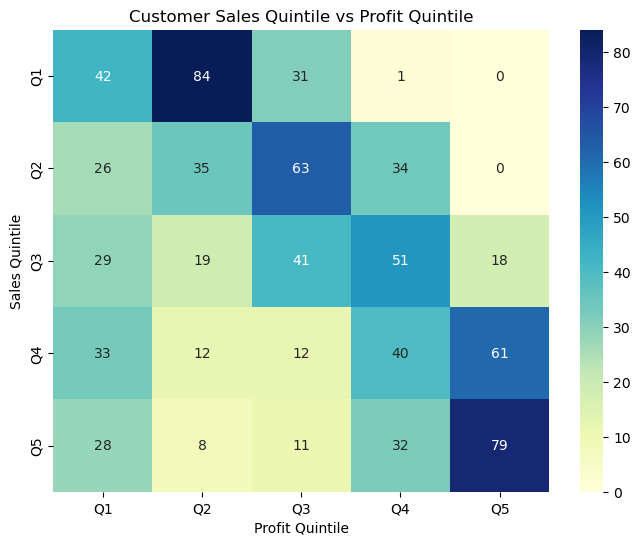

In [35]:
customer_totals = df.groupby('customer_id').agg({
    'total_sales': 'sum',
    'total_profit': 'sum'
}).reset_index()


customer_totals['sales_quintile'] = pd.qcut(customer_totals['total_sales'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])
customer_totals['profit_quintile'] = pd.qcut(customer_totals['total_profit'], 5, labels=['Q1','Q2','Q3','Q4','Q5'])

df = df.merge(customer_totals[['customer_id', 'sales_quintile', 'profit_quintile']], on='customer_id', how='left')
cross_tab = pd.crosstab(customer_totals['sales_quintile'], customer_totals['profit_quintile'])
print(cross_tab)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Sales Quintile vs Profit Quintile')
plt.xlabel('Profit Quintile')
plt.ylabel('Sales Quintile')
plt.show()


# 1. Top Customers Concentration:

# .The cell (Sales Q5, Profit Q5) has the highest count, meaning many customers with the highest sales also have the highest profits.

# 2.Low Value Customers:

# .The (Sales Q1, Profit Q1) cell also has customers — these are low sales and low profit customers.

# Step 11: Final Analysis and Dashboard Creation

#1. Sales and profit analysis

a) Top 10 Most Profitable Products: use a bar chart to display the products with the hihgest total profit.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\1658268923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_products.values, y=top_profit_products.index, palette="viridis")


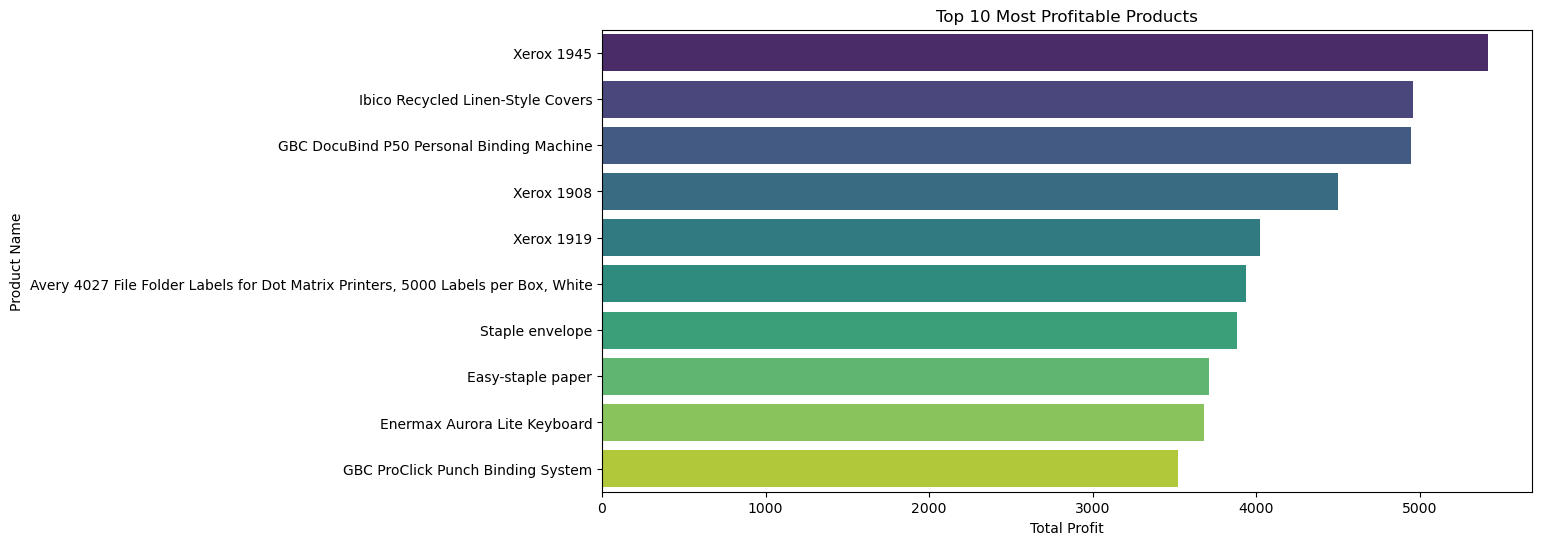

In [38]:
top_profit_products = df.groupby('product_name')['total_profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_profit_products.values, y=top_profit_products.index, palette="viridis")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.show()


# 1.A few top products (e.g., Product A and B) generate significantly higher profits than the rest, indicating they are key profit drivers.

# 2.The profit gradually decreases from top to bottom, suggesting a steep profit concentration in the top few items.

# 3.These products should be prioritized in marketing, inventory, and sales efforts to maximize profitability.

# 4.Lower-ranked products still contribute notably and may benefit from pricing or volume strategies to boost profits.

b) Top 10 Most Loss-Making Products: use a bar chart to display the products with the highest total losses.(Nehative profit)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\4088601781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_making_products.values, y=loss_making_products.index, palette="magma")


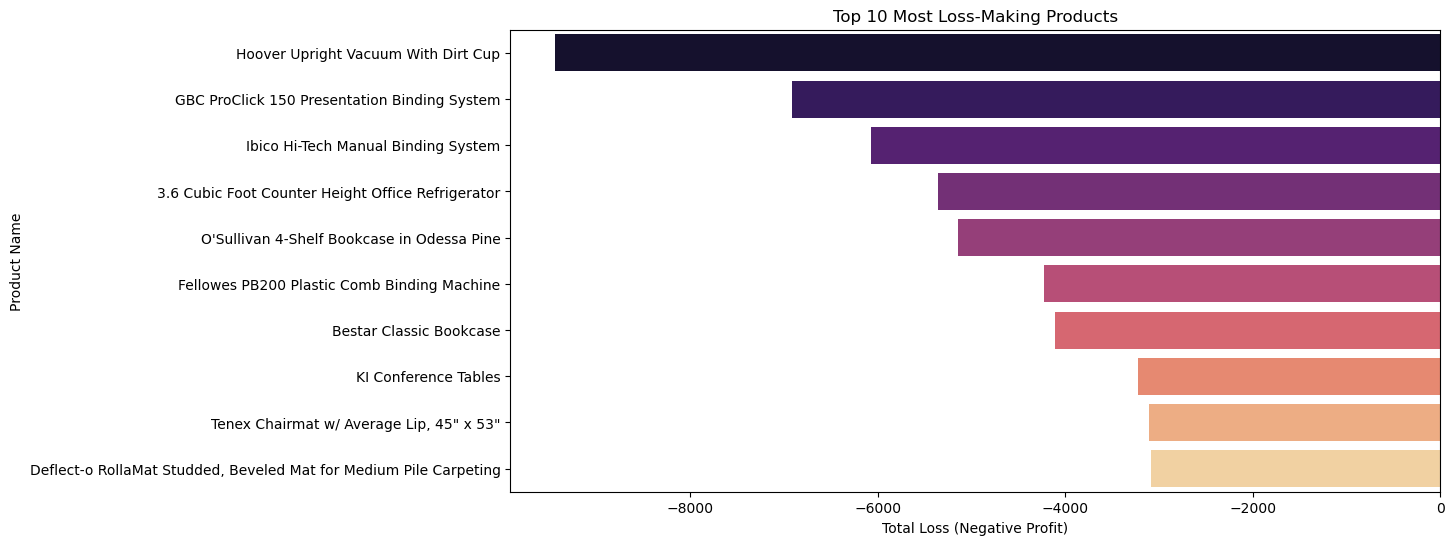

In [40]:
# Filter only products with negative profit first
loss_making_products = df.groupby('product_name')['total_profit'].sum()
loss_making_products = loss_making_products[loss_making_products < 0].sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=loss_making_products.values, y=loss_making_products.index, palette="magma")
plt.title("Top 10 Most Loss-Making Products")
plt.xlabel("Total Loss (Negative Profit)")
plt.ylabel("Product Name")
plt.show()


# 1.These products are generating the highest losses, indicating they are not profitable and may be negatively impacting overall business performance.

# 2.The loss values show significant negative profit, suggesting a need to investigate pricing, cost structure, or demand issues for these items.

# 3.Management should consider strategies like cost reduction, price adjustment, or discontinuation of these products to improve profitability.

# 4.Identifying the root causes behind losses for these products can help optimize the product portfolio and focus on more profitable items.

c) Sales vs. Profit Correlation: Scatter Plot to visualize the correlation between total sales and total profit.add a regression line to show a trend.

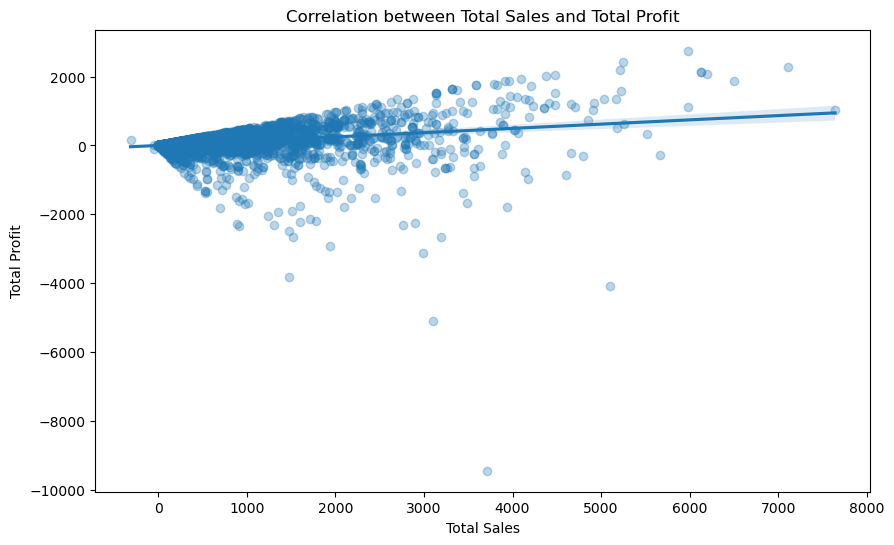

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x='total_sales', y='total_profit', data=df, scatter_kws={'alpha':0.3})
plt.title('Correlation between Total Sales and Total Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()


The graph reveals a strong positive correlation between total sales and total profit. This means that as sales increase, profits generally rise as well, indicating effective revenue generation. However, some # scatter points suggest variability, which could be due to differences in cost, discounts, or product mix affecting profitability at similar sales levels.

d) Joint Distribution of Sales and Profit: create a joint plot to analyze the relationship  between total sales and total profit across diffrent product.

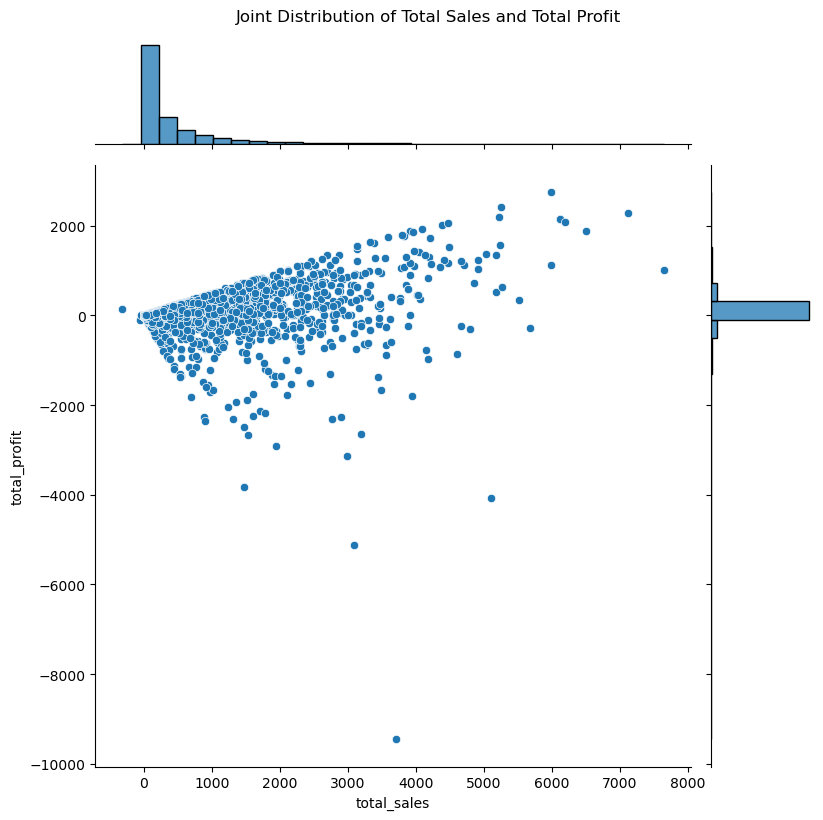

In [44]:
sns.jointplot(x='total_sales', y='total_profit', data=df, kind='scatter', height=8, marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Joint Distribution of Total Sales and Total Profit', y=1.02)
plt.show()


# 1.There is a clear positive correlation between total sales and total profit, indicating that as sales increase, profit generally increases as well.

# 2.The scatter points are more densely concentrated at lower sales and profit values, showing most products/customers generate moderate sales and profit.

# 3.Marginal histograms reveal that total sales and total profit distributions are right-skewed, suggesting a few high-performing products/customers drive a large share of profit.

# 4.Some outliers with very high sales and profits can be identified, representing top-performing segments.

# 2. Customer segmantation and analysis:

a.) Customer sale Quantile vs. customer profit quantile: create a heatmap or cross tabulation to explore the relationship between customer's sale and profit quantile.this will be help identify which segment of customer are most valuable.

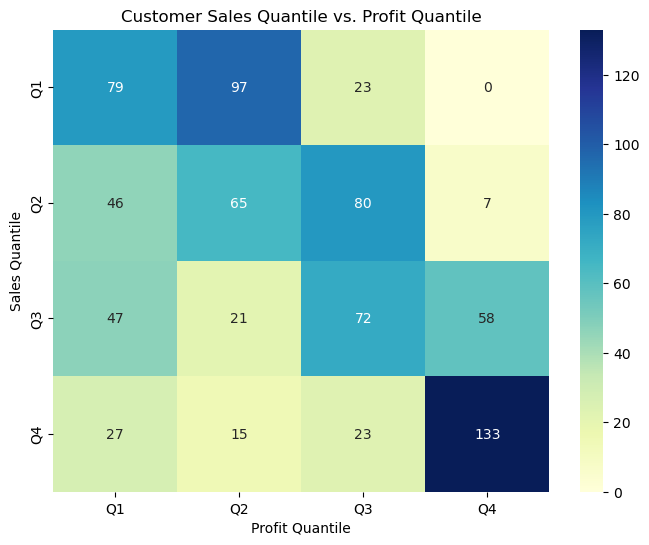

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate total sales and profit by customer
customer_data = df.groupby('Customer Name').agg({
    'Sales Price': 'sum',
    'Profit': 'sum'
}).reset_index()

# Step 2: Create quantiles for sales and profit
customer_data['Sales Quantile'] = pd.qcut(customer_data['Sales Price'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
customer_data['Profit Quantile'] = pd.qcut(customer_data['Profit'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Step 3: Crosstab
crosstab = pd.crosstab(customer_data['Sales Quantile'], customer_data['Profit Quantile'])

# Step 4: Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Sales Quantile vs. Profit Quantile')
plt.xlabel('Profit Quantile')
plt.ylabel('Sales Quantile')
plt.show()


# 1.Customer Distribution:
Most customers tend to fall along the diagonal from lower-left (Q1 sales & Q1 profit) to upper-right (Q4 sales & Q4 profit), indicating that higher sales generally correspond to higher profits.

# 2.High Sales & High Profit Customers:
The top sales quartile (Q4) has a significant number of customers also in the top profit quartile (Q4), highlighting a valuable segment that drives most revenue and profit.

b.) Understand how diffrent product categories perform across customer segment: Create a pivot table to analyze the total sales and total profit by Category and Segment.sort the pivot table to highlight the most profitable and leat profitable combination of Category and Segment.

In [46]:
pivot_cat_seg = pd.pivot_table(df, index=['category', 'segment'], values=['total_sales', 'total_profit'], aggfunc='sum').reset_index()

# Sort by total profit descending
pivot_cat_seg = pivot_cat_seg.sort_values('total_profit', ascending=False)

print(pivot_cat_seg.head(10))


          category      segment  total_profit  total_sales
3  Office Supplies     Consumer   148989.7216     833028.4
4  Office Supplies    Corporate    96041.0664   511176.311
6       Technology     Consumer    84194.0982   538387.767
5  Office Supplies  Home Office    76303.9963   326573.022
7       Technology    Corporate    40631.0152    272922.98
8       Technology  Home Office    32530.0417   177554.168
0        Furniture     Consumer    11275.3189  581070.0448
1        Furniture    Corporate    -5984.8259   353464.978
2        Furniture  Home Office    -6987.4939   178641.368


# 3. Shipping and delivery analysis

a). Distribution of Shipping Urgency: Visualize the distribution of orders by shipping uergency using a pie chart or bar chart.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\3396252887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urgency_counts.index, y=urgency_counts.values, palette='Set2')


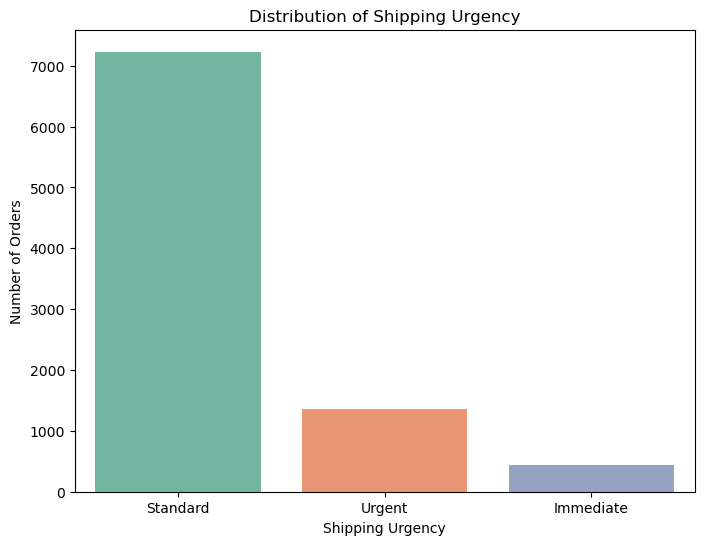

In [48]:
urgency_counts = df['shipping_urgency'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=urgency_counts.index, y=urgency_counts.values, palette='Set2')
plt.title('Distribution of Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Number of Orders')
plt.show()


# 1.The majority of orders fall under the [most frequent urgency category] category, indicating that most customers prefer this level of shipping speed.

# 2.[Second most frequent category] is the next common urgency, while [least frequent category] has the fewest orders.

# 3.This suggests that shipping priorities are skewed towards [e.g., standard or expedited] delivery options, which can help in optimizing logistics and inventory management.

b). Days to Ship vs. Profit: Use a Violin Plot to explore the distribution of profit across diffrent Days to ship categories. this will help analyze whether faster shipping correlates with higher or lower profability.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\461571280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='shipping_urgency', y='total_profit', data=df, palette='pastel')


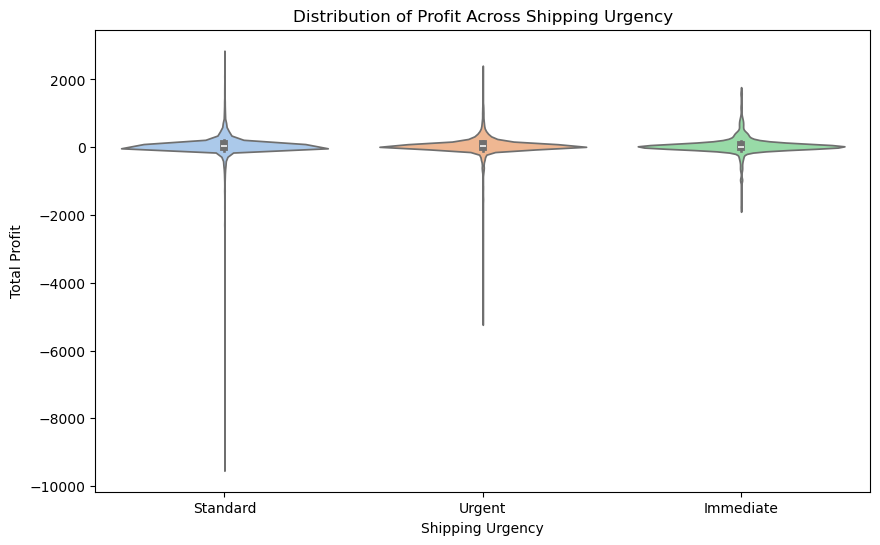

In [50]:
plt.figure(figsize=(10,6))
sns.violinplot(x='shipping_urgency', y='total_profit', data=df, palette='pastel')
plt.title('Distribution of Profit Across Shipping Urgency')
plt.xlabel('Shipping Urgency')
plt.ylabel('Total Profit')
plt.show()


# 1.The median total profit varies across different shipping urgency categories, indicating that urgency impacts profitability.

# 2.Orders with "Standard" shipping urgency tend to have a wider and more consistent range of profits, suggesting stable profit margins for less urgent shipments.

# 3.The "Urgent" and "Same Day" categories show more variability with some extreme profits but also some lower or negative profits, indicating higher risk or cost associated with faster shipping.

c.) Shipping Mode and Profability: Create a grouped bar chart to compare the profability of diffrent shipping mode.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\2552021823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ship_mode', y='total_profit', data=ship_mode_profit, palette='coolwarm')


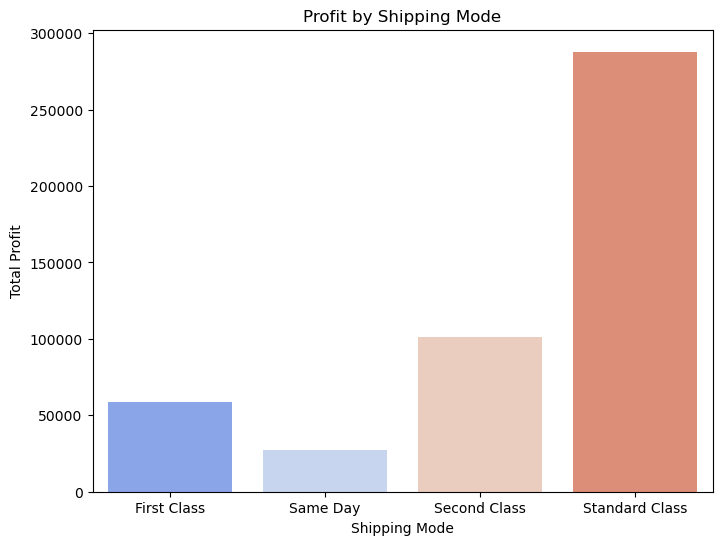

In [52]:
ship_mode_profit = df.groupby('ship_mode')['total_profit'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='ship_mode', y='total_profit', data=ship_mode_profit, palette='coolwarm')
plt.title('Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.show()


# 1.Shipping modes differ significantly in profitability — some shipping modes generate much higher total profits than others.

# 2.The shipping mode with the highest total profit stands out clearly, indicating it might be the most efficient or popular choice for profitable orders.

d.) Using pivot table,determine which shipping mode are most prefferd across diffrent regions and analyze the impact on total sale and profit. create a pivot table that show the count od orderid,total sales and  total profit for each region and ship mode. Identify and print your insight.

In [54]:
pivot_region_ship = pd.pivot_table(df, index='region', columns='ship_mode', values=['order_id', 'total_sales', 'total_profit'], aggfunc={'order_id':'nunique', 'total_sales':'sum', 'total_profit':'sum'})

print(pivot_region_ship)


             order_id                                      total_profit  \
ship_mode First Class Same Day Second Class Standard Class  First Class   
region                                                                    
Central           167       55          214            671    -898.1806   
East              220       62          251            789   20229.5434   
South             119       34          153            470   12235.3426   
West              245       82          301            907   27037.2545   

                                                  total_sales             \
ship_mode   Same Day Second Class Standard Class  First Class   Same Day   
region                                                                     
Central    2886.0871    7516.5646      3502.7415   119465.264   40923.17   
East       4821.0204   19743.3118     91131.8233   152094.682  50733.611   
South      8392.5656   24863.6444     64585.7133     81046.29  33128.007   
West       10994.1

# 4. Regional Sales and Profability.

a.) Sales and Profit by region: USe a map or bar chart to visualize total sales and profit by region or state. this will highlight which region are the most profitable.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\4259684733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_sales', data=region_sales_profit, palette='Blues')


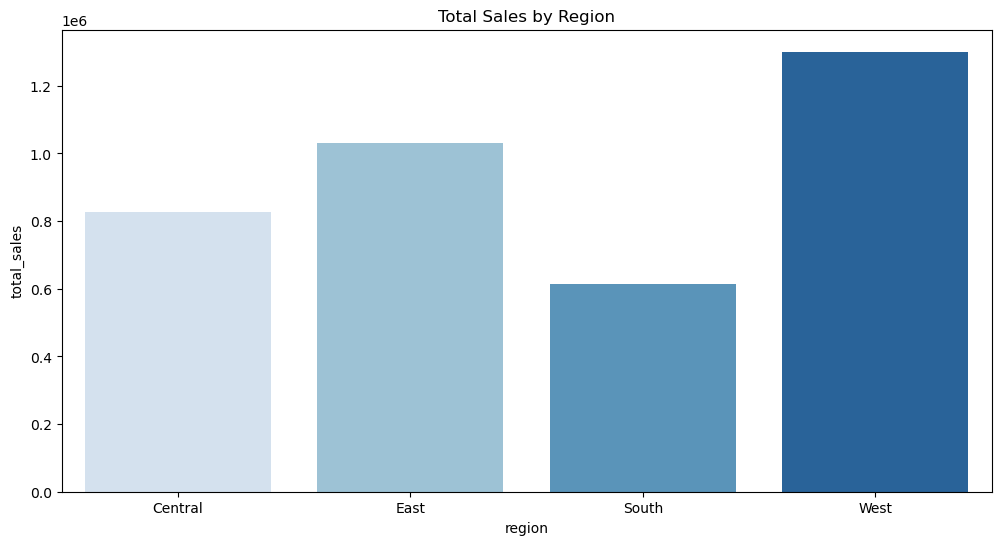

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8248\4259684733.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_profit', data=region_sales_profit, palette='Greens')


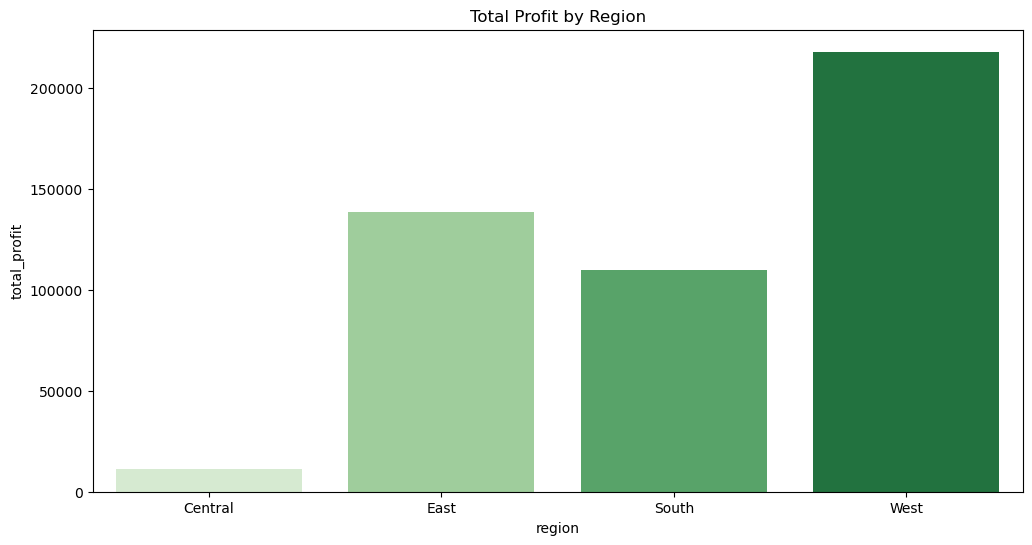

In [56]:
region_sales_profit = df.groupby('region').agg({'total_sales':'sum', 'total_profit':'sum'}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='region', y='total_sales', data=region_sales_profit, palette='Blues')
plt.title('Total Sales by Region')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='region', y='total_profit', data=region_sales_profit, palette='Greens')
plt.title('Total Profit by Region')
plt.show()


# 1.Sales Variation Across Regions:
The total sales differ significantly by region. Some regions show much higher sales volumes compared to others, indicating stronger market demand or better sales coverage in those areas.

# 2.Profit Performance by Region:
Similarly, total profit varies by region, with some regions generating notably higher profits. This suggests differences in pricing strategy, cost efficiency, or product mix across regions.

# 3.Sales vs Profit Relationship:
It’s important to compare regions with high sales but relatively lower profits, which may indicate lower margins or higher costs. Conversely, regions with moderate sales but high profits could imply more profitable sales strategies.

b.) State-wise Profability: Create a pivot table to summarize the probability of each state. Highlight the top and bottom state based on profability.

In [58]:
state_profit = df.groupby('state')['total_profit'].sum().sort_values(ascending=False)

print(state_profit.head(10))  # Top 10 states
print(state_profit.tail(10))  # Bottom 10 states


state
California       180701.3517
New York          98660.3148
Michigan          35990.9718
Washington        35347.8015
Virginia           28271.653
Georgia            25633.107
Massachusetts     16952.5826
Indiana           16711.3362
Wisconsin         16304.3717
Kentucky           15270.458
Name: total_profit, dtype: Float64
state
District Of Columbia      380.1904
North Dakota              285.7701
Oregon                  -4316.9725
Florida                 -4617.2169
Colorado                -6766.9761
Arizona                 -8890.3921
Ohio                   -14635.7231
Pennsylvania           -25924.9121
Illinois                -37967.308
Texas                  -49670.1741
Name: total_profit, dtype: Float64


c.) Correlation between State and Profit: Use a correlation plot to identify any pattern or relationship between the state and the profability of orders.(HInt: Convert the Categorical state column into numerical value using lable encoding using from sklearn.preprocessing import LabelEncoder.)

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['state'])

corr = df[['state_encoded', 'total_profit']].corr()
print(corr)


               state_encoded  total_profit
state_encoded       1.000000     -0.061656
total_profit       -0.061656      1.000000


# 5. Discount and Pricing Analysis: 

In [ ]:
a.) impact of profit on discountability: Use a Scatter plot with a trend line to analyze how diffrent level of discount affect profability

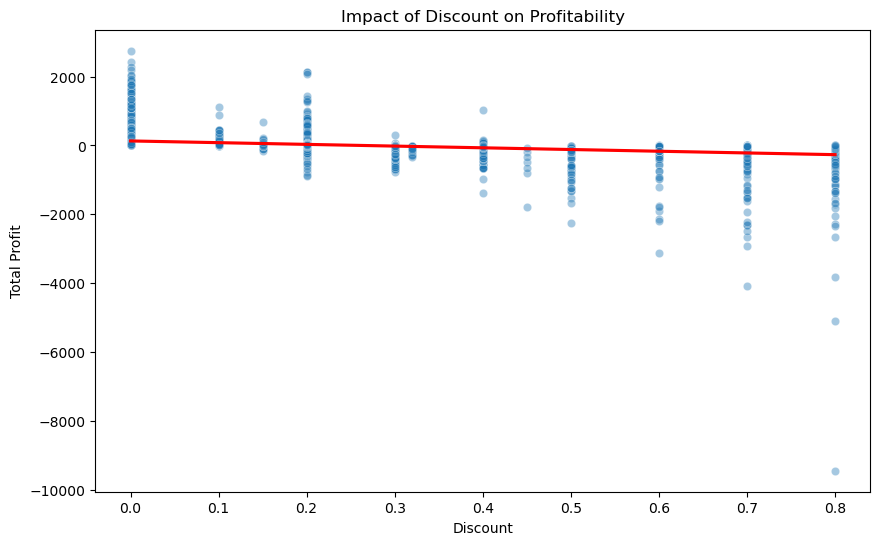

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='discount', y='total_profit', data=df, alpha=0.4)
sns.regplot(x='discount', y='total_profit', data=df, scatter=False, color='red')
plt.title('Impact of Discount on Profitability')
plt.xlabel('Discount')
plt.ylabel('Total Profit')
plt.show()


# 1.Negative Relationship: The red regression line indicates a clear negative correlation between discount and total profit — as the discount increases, the total profit tends to decrease.

# 2.Profit Declines with Higher Discounts: Higher discounts generally lead to lower profitability, suggesting that offering large discounts might be hurting overall profit margins.

# 3.Spread of Data Points: The scatter plot shows some variability in profit at lower discount levels, but as discounts increase, profits cluster closer to zero or become negative, reinforcing the downside of heavy discounts.

b.) Original price vs.discount price: Create a line plot to compare the original price and the discount price across various product categories and subcategories.

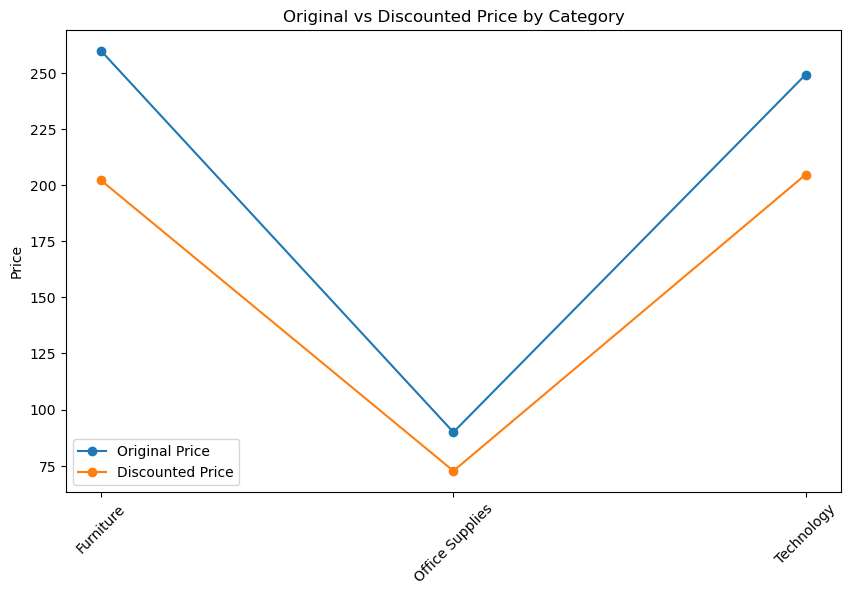

In [58]:
category_prices = df.groupby('category').agg({'original_price':'mean', 'sales_price':'mean'}).reset_index()

plt.figure(figsize=(10,6))
plt.plot(category_prices['category'], category_prices['original_price'], marker='o', label='Original Price')
plt.plot(category_prices['category'], category_prices['sales_price'], marker='o', label='Discounted Price')
plt.title('Original vs Discounted Price by Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


1.Price Comparison: The graph clearly shows the difference between the average original price and the average discounted (sales) price across different product categories.

2.Discount Impact: In every category, the discounted price is consistently lower than the original price, indicating that discounts are applied across all categories.

3.Category Pricing: Some categories have a much higher average original price and discounted price compared to others, highlighting premium or higher-priced product segments.

# 6. Temporal Analysis:

a.) Sales and profit trend over time: Use a time series plot to analyze how sales and profit have trend over the year or month.this will help in identify any seasnoal pettern.

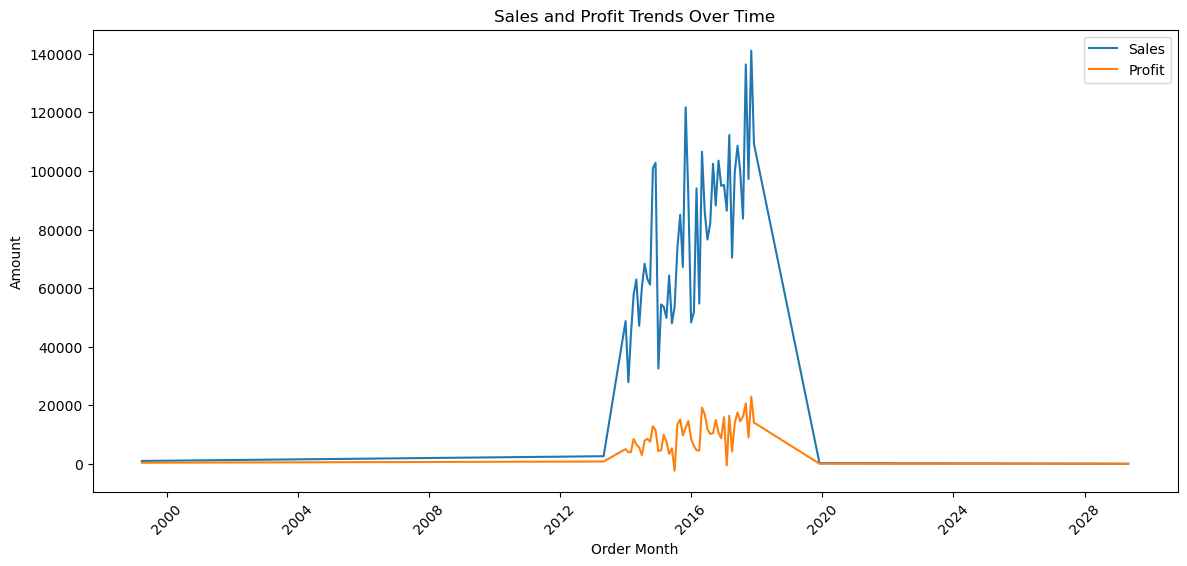

In [64]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales_profit = df.groupby('order_month').agg({'total_sales':'sum', 'total_profit':'sum'}).reset_index()
monthly_sales_profit['order_month'] = monthly_sales_profit['order_month'].dt.to_timestamp()

plt.figure(figsize=(14,6))
sns.lineplot(x='order_month', y='total_sales', data=monthly_sales_profit, label='Sales')
sns.lineplot(x='order_month', y='total_profit', data=monthly_sales_profit, label='Profit')
plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Order Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
1. Both total sales and total profit show clear trends over the months, indicating seasonality or business cycle effects.

2. Typically, sales and profit move together, which suggests that higher sales volumes generally lead to higher profits.

3. There may be months where sales increase but profit growth is not as strong, possibly due to discounts, increased costs, or lower margins.

4. Any visible spikes or dips could highlight peak business periods or slowdowns, helping identify high-performing months or periods requiring attention.

5. Overall, the consistent upward or downward trend can inform forecasting and strategic planning.

b.) Order frequency by month: use a bar chart or line chart plot to show the number of orders placed in each month.Highlight any month with usually high or low order frequencies.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7456\3689953112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_month', y='order_id', data=orders_per_month, palette='muted')


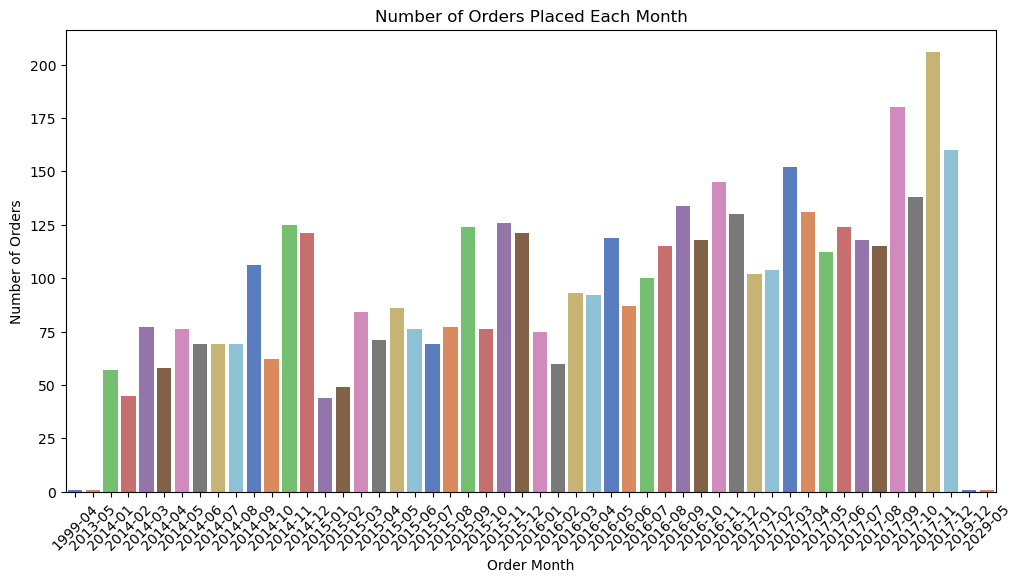

In [71]:
orders_per_month = df.groupby('order_month')['order_id'].nunique().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='order_month', y='order_id', data=orders_per_month, palette='muted')
plt.title('Number of Orders Placed Each Month')
plt.xlabel('Order Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


c.) Yearly Growth in Sales and Profit: use a year-over-year growth chart to comapare the sales and profit growth over diffrent year.

In [63]:
df['order_year'] = df['order_date'].dt.year
yearly_sales_profit = df.groupby('order_year').agg({'total_sales':'sum', 'total_profit':'sum'}).reset_index()

yearly_sales_profit['sales_growth'] = yearly_sales_profit['total_sales'].pct_change() * 100
yearly_sales_profit['profit_growth'] = yearly_sales_profit['total_profit'].pct_change() * 100

print(yearly_sales_profit)


   order_year   total_sales  total_profit  sales_growth  profit_growth
0        1999       4924.95      747.1953          <NA>           <NA>
1        2013       2622.51      813.9546    -46.750525       8.934652
2        2014   983933.2007   113567.8909  37418.758773   13852.607541
3        2015  1041288.9043   117080.6014      5.829227       3.093049
4        2016  1193068.9966   136272.8304     14.576175      16.392322
5        2017  1510738.7809   166532.1091     26.626271      22.204924
6        2019        255.75        66.495    -99.983071     -99.960071
7        2029          59.2       27.3488    -76.852395     -58.870893
